In [1]:
import pandas as pd

data = pd.read_csv("../../dataset/dataset_final.csv")
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Target
0,-4.362150,-1.007771,-2.563540,1.331845,-1.075936,-1.368674,-0.191537,-0.373345,-0.803115,0.837092,1.623067,-0.261753,0.235638,-0.326818,Dropout
1,-0.241665,-0.291954,-1.576865,-1.195618,1.024771,0.349829,-0.015485,-0.468722,-0.327269,0.175780,-2.409748,-0.823892,-0.581045,-0.973223,Graduate
2,-2.704703,0.883059,0.227150,-0.584111,-0.216966,-0.617850,0.370419,0.055970,-1.348930,-0.152507,-2.033690,0.099927,-1.232974,-0.678305,Dropout
3,0.366266,-0.237005,0.779684,-0.273035,-0.053979,-0.070852,-0.957714,-1.342641,-0.319636,-0.506683,-0.036937,1.136352,0.300461,-0.328121,Graduate
4,0.002403,2.173728,-0.855346,1.884833,1.329653,0.679385,-0.600227,-0.520670,0.723744,0.238530,0.123345,0.951798,-0.536999,0.329798,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,0.060873,-1.038330,-0.659588,-0.622870,0.090081,0.225687,0.144346,-0.735628,1.092355,-0.388809,-0.191486,-0.284427,-0.311598,-0.111791,Enrolled
6623,1.148948,-1.170207,-0.717351,-0.962082,0.870401,0.614360,0.009241,-0.920165,0.642480,0.390729,-0.037445,-0.035594,-0.211604,-0.474668,Enrolled
6624,-1.002743,0.146619,1.154968,-0.141683,-1.294870,-0.938337,0.429822,-0.098083,0.023849,-0.824973,0.271648,0.682401,0.797084,0.081801,Enrolled
6625,-0.388730,1.818346,0.501319,1.047079,0.424902,0.603358,-0.964207,-1.525201,0.314041,-0.649624,0.409576,0.568857,-0.749601,-0.016070,Enrolled


In [2]:
print(data['PC1'].std())
print(data['PC1'].mean())

1.7886068491845746
-0.17402570479346016


In [3]:
print(data['PC2'].std())
print(data['PC2'].mean())

1.3305666704397283
0.06070251183079263


In [4]:
features = data.drop(['Target'], axis = 1)

target = data['Target']
target.value_counts()

Dropout     2209
Graduate    2209
Enrolled    2209
Name: Target, dtype: int64

Now that the dataset is balanced, need to split the data into training (70%), testng (20%) and validating (10%) datasets.


In [6]:
from sklearn.model_selection import train_test_split

#training data is 70%, 30% of dataset is a temporary one which will be further split
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size = 0.3, random_state = 42) 

#splitting the temp dataset into validation and testing data
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=10/30, random_state=42)

#checking split
print("Total number of datapoints: "+str(features.shape[0]))
print("Number of datapoints in the training set: "+str(X_train.shape[0]))
print("Number of datapoints in the validation set: "+str(X_val.shape[0]))
print("Number of datapoints in the test set: "+str(X_test.shape[0]))


Total number of datapoints: 6627
Number of datapoints in the training set: 4638
Number of datapoints in the validation set: 663
Number of datapoints in the test set: 1326


**K-nearest neighbours (KNN) Algorithm**


To ensure that all features equally contribute to the computation of distances, when KNN is applied, we need to standardise them


In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np

#fit the standardscaler on the training data and use it to transform the validation and test data
#learn the statistics from the training data - mean and stdev of the training data to scale the training, valid and test data as well
scaler = StandardScaler()
#does the fit and transform in one step
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

for i in range(X_train.shape[1]):
  print("feature: %2d - Mean: %.1f - Std: %.3f - Min: %.3f - Max: %.3f" % (i+ 1,  np.mean(X_train[:,i]), np.std(X_train[:,i]), np.min(X_train[:,i]), np.max(X_train[:,i])))

feature:  1 - Mean: 0.0 - Std: 1.000 - Min: -2.603 - Max: 7.321
feature:  2 - Mean: 0.0 - Std: 1.000 - Min: -1.873 - Max: 6.381
feature:  3 - Mean: -0.0 - Std: 1.000 - Min: -5.698 - Max: 3.126
feature:  4 - Mean: 0.0 - Std: 1.000 - Min: -7.013 - Max: 3.420
feature:  5 - Mean: 0.0 - Std: 1.000 - Min: -5.719 - Max: 2.876
feature:  6 - Mean: 0.0 - Std: 1.000 - Min: -4.951 - Max: 12.801
feature:  7 - Mean: 0.0 - Std: 1.000 - Min: -7.925 - Max: 2.407
feature:  8 - Mean: 0.0 - Std: 1.000 - Min: -2.312 - Max: 8.823
feature:  9 - Mean: 0.0 - Std: 1.000 - Min: -6.703 - Max: 3.603
feature: 10 - Mean: -0.0 - Std: 1.000 - Min: -5.693 - Max: 6.341
feature: 11 - Mean: -0.0 - Std: 1.000 - Min: -3.566 - Max: 4.447
feature: 12 - Mean: -0.0 - Std: 1.000 - Min: -4.760 - Max: 5.191
feature: 13 - Mean: 0.0 - Std: 1.000 - Min: -3.088 - Max: 4.463
feature: 14 - Mean: -0.0 - Std: 1.000 - Min: -6.091 - Max: 5.029


Chosing k based on the accuracy of the predictor on the validation data, and trying three different metrics


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#try these values of k
num_neighbours = [1, 3, 5, 7, 9, 11, 13, 15, 21, 27, 31, 45, 65, 131]
#store performances for each of the classifiers in this empty list
performance_euclidean = []

for k in num_neighbours:
  clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  clf.fit(X_train, y_train)
  
  #make predictions on validation and check performance on it
  y_pred = clf.predict(X_val)
  acc = accuracy_score(y_val, y_pred)
  performance_euclidean.append(acc)

performance_manhattan = []
for k in num_neighbours:
  clf = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  clf.fit(X_train, y_train)
  
  #make predictions on validation and check performance on it
  y_pred = clf.predict(X_val)
  acc = accuracy_score(y_val, y_pred)
  performance_manhattan.append(acc)


performance_cosine = []
for k in num_neighbours:
  clf = KNeighborsClassifier(n_neighbors=k, metric='cosine')
  clf.fit(X_train, y_train)
  
  #make predictions on validation and check performance on it
  y_pred = clf.predict(X_val)
  acc = accuracy_score(y_val, y_pred)
  performance_cosine.append(acc)


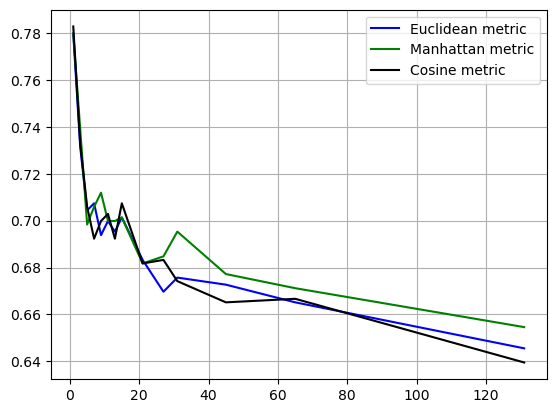

In [9]:
plt.plot(num_neighbours, performance_euclidean, '-b', label = 'Euclidean metric')
plt.plot(num_neighbours, performance_manhattan, '-g', label = 'Manhattan metric')
plt.plot(num_neighbours, performance_cosine, '-k', label = 'Cosine metric')
plt.grid(True)
plt.legend()

k=1 makes sense, a good approach is to start off with k = sqrt(n)/2 - sqrt(8)/2 ~ 1.4

Although, k=1 is usually a case for overfitting, but with the few features we have it might make sense


keeping k=1, now we can make predictions on the test data, at the moment checking also the metric


In [10]:
from sklearn.metrics import classification_report

clf = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
clf.fit(X_train, y_train)
#validation set was used to find number of k
#test set is completely unseens
y_pred = clf.predict(X_test)
#acc = accuracy_score(y_test, y_pred)

#print("The performance of the KNN is: %.2f"%(acc))

print("\nClassification Report for Manhattan Metric:")
print(classification_report(y_test, y_pred))


Classification Report for Manhattan Metric:
              precision    recall  f1-score   support

     Dropout       0.86      0.80      0.83       474
    Enrolled       0.72      0.87      0.79       421
    Graduate       0.80      0.71      0.75       431

    accuracy                           0.79      1326
   macro avg       0.79      0.79      0.79      1326
weighted avg       0.80      0.79      0.79      1326



changing for euclidian metric


In [11]:
clf = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nClassification Report for Euclidean Metric:")
print(classification_report(y_test, y_pred))


Classification Report for Euclidean Metric:
              precision    recall  f1-score   support

     Dropout       0.85      0.80      0.82       474
    Enrolled       0.70      0.85      0.77       421
    Graduate       0.79      0.68      0.73       431

    accuracy                           0.78      1326
   macro avg       0.78      0.78      0.78      1326
weighted avg       0.78      0.78      0.78      1326



In [12]:
clf = KNeighborsClassifier(n_neighbors=1, metric='cosine')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nClassification Report for Cosine Metric:")
print(classification_report(y_test, y_pred))


Classification Report for Cosine Metric:
              precision    recall  f1-score   support

     Dropout       0.86      0.78      0.82       474
    Enrolled       0.71      0.85      0.77       421
    Graduate       0.78      0.71      0.74       431

    accuracy                           0.78      1326
   macro avg       0.78      0.78      0.78      1326
weighted avg       0.78      0.78      0.78      1326



running the manhattan distance again since it is slightly better and keeping that data stored


In [13]:
clf = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nClassification Report for Manhattan Metric:")
print(classification_report(y_test, y_pred))


Classification Report for Manhattan Metric:
              precision    recall  f1-score   support

     Dropout       0.86      0.80      0.83       474
    Enrolled       0.72      0.87      0.79       421
    Graduate       0.80      0.71      0.75       431

    accuracy                           0.79      1326
   macro avg       0.79      0.79      0.79      1326
weighted avg       0.80      0.79      0.79      1326



Confusion matrix to show the actual classes vs the predicted classes based on the test data


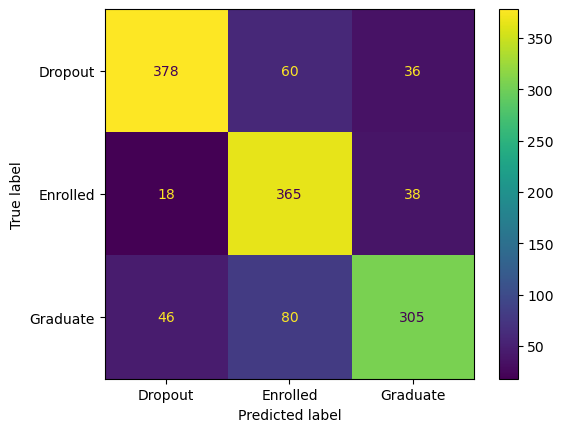

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Trying the same script but on the reduced dataset of 17 variables + Target variable


In [ ]:
data_nonpca = pd.read_csv("../../dataset/dataset_selected_pred.csv")
data_nonpca

In [ ]:
features_nonpca = data_nonpca.drop(['target'], axis = 1)

target_nonpca = data_nonpca['target']
target_nonpca.value_counts()

In [ ]:
count_class = target_nonpca.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show

In [ ]:
from imblearn.over_sampling import SMOTE

#setting the seed for reproducibility
smote = SMOTE(sampling_strategy="minority", random_state=42) #taking the minority approach to generate synthetic values for the minority class.

features_nonpca_bal,target_nonpca_bal = smote.fit_resample(features_nonpca, target_nonpca)
target_nonpca.value_counts()

#repeat again since there are three classes and 2 are undersampled
features_nonpca_bal,target_nonpca_bal = smote.fit_resample(features_nonpca_bal, target_nonpca_bal)
target_nonpca_bal.value_counts()

In [ ]:
#training data is 70%, 30% of dataset is a temporary one which will be further split
Xnp_train, Xnp_temp, ynp_train, ynp_temp = train_test_split(features_nonpca_bal, target_nonpca_bal, test_size = 0.3, random_state = 42) 

#splitting the temp dataset into validation and testing data
Xnp_test, Xnp_val, ynp_test, ynp_val = train_test_split(Xnp_temp, ynp_temp, test_size=10/30, random_state=42)

#checking split
print("Total number of datapoints: "+str(features_nonpca_bal.shape[0]))
print("Number of datapoints in the training set: "+str(Xnp_train.shape[0]))
print("Number of datapoints in the validation set: "+str(Xnp_val.shape[0]))
print("Number of datapoints in the test set: "+str(Xnp_test.shape[0]))

In [ ]:
#fit the standardscaler on the training data and use it to transform the validation and test data
#learn the statistics from the training data - mean and stdev of the training data to scale the training, valid and test data as well
scaler = StandardScaler()
#does the fit and transform in one step
Xnp_train = scaler.fit_transform(Xnp_train)

Xnp_val = scaler.transform(Xnp_val)
Xnp_test = scaler.transform(Xnp_test)

for i in range(Xnp_train.shape[1]):
  print("feature: %2d - Mean: %.1f - Std: %.3f - Min: %.3f - Max: %.3f" % (i+ 1,  np.mean(Xnp_train[:,i]), np.std(Xnp_train[:,i]), np.min(Xnp_train[:,i]), np.max(Xnp_train[:,i])))

In [20]:
#try these values of k
num_np_neighbours = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
#store performances for each of the classifiers in this empty list
performance_np_euclidean = []

for k in num_np_neighbours:
  clf_np = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  clf_np.fit(Xnp_train, ynp_train)
  
  #make predictions on validation and check performance on it
  ynp_pred = clf_np.predict(Xnp_val)
  acc_np = accuracy_score(ynp_val, ynp_pred)
  performance_np_euclidean.append(acc_np)

performance_np_manhattan = []
for k in num_np_neighbours:
  clf_np = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  clf_np.fit(Xnp_train, ynp_train)
  
  #make predictions on validation and check performance on it
  ynp_pred = clf_np.predict(Xnp_val)
  acc_np = accuracy_score(ynp_val, ynp_pred)
  performance_np_manhattan.append(acc_np)


performance_np_cosine = []
for k in num_np_neighbours:
  clf_np = KNeighborsClassifier(n_neighbors=k, metric='cosine')
  clf_np.fit(Xnp_train, ynp_train)
  
  #make predictions on validation and check performance on it
  ynp_pred = clf_np.predict(Xnp_val)
  acc_np = accuracy_score(ynp_val, ynp_pred)
  performance_np_cosine.append(acc_np)


In [ ]:
plt.plot(num_np_neighbours, performance_np_euclidean, '-b', label = 'Euclidean metric')
plt.plot(num_np_neighbours, performance_np_manhattan, '-g', label = 'Manhattan metric')
plt.plot(num_np_neighbours, performance_np_cosine, '-k', label = 'Cosine metric')
plt.grid(True)
plt.legend()

Clearly, Euclidean metric works better than the other metrics


In [ ]:
performance_np_manhattan[5]==performance_np_manhattan[7]

In [ ]:
performance_np_manhattan

for non pca variables, can keep k=9 with manhattan metric


In [ ]:
from sklearn.metrics import classification_report

clf_np = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
clf_np.fit(Xnp_train, ynp_train)
#validation set was used to find number of k
#test set is completely unseens
ynp_pred = clf_np.predict(Xnp_test)

print("\nClassification Report for Manhattan Metric:")
print(classification_report(ynp_test, ynp_pred))

In [ ]:
cm_np = confusion_matrix(ynp_test, ynp_pred, labels=clf_np.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_np, display_labels=clf_np.classes_)
disp.plot()
plt.show()

accuracy here is better and without having gone through PCA
